In [20]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport


c:\Users\Santi\Desktop\IA clase\ProyectoFinal\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df =pd.read_csv("Bank_Transaction_Fraud_Detection.csv")
"""
Nombres de las columnas:

Customer_ID             - Identificador único del cliente
Customer_Name           - Nombre del cliente
Gender                  - Género del cliente
Age                     - Edad del cliente
State                   - Estado en el que vive
City                    - Ciudad en la que vive
Bank_Branch             - Sucursal bancaria asociada
Account_Type            - Tipo de cuenta que tiene el cliente (control, ahorros o negocios)
Transaction_ID          - Identificador de la transacción
Transaction_Date        - Fecha de la transacción
Transaction_Time        - Hora de la transacción
Transaction_Amount      - Cantidad de dinero en la operación
Merchant_ID             - Identificador del comercio
Transaction_Type        - Tipo de transacción (crédito o débito)
Merchant_Category       - Categoría del comercio (restaurante, entretenimiento, electrónica, etc.)
Account_Balance         - Balance de la cuenta del cliente
Transaction_Device      - Dispositivo utilizado para la transacción (móvil, ATM, etc.)
Transaction_Location    - Ubicación de la transacción (ciudad, estado, etc.)
Device_Type             - Tipo de dispositivo utilizado (móvil, ordenador, etc.)
Transaction_Currency    - Moneda utilizada en la transacción
Customer_Contact        - Número de teléfono del cliente
Transaction_Description - Descripción de la transacción
Customer_Email          - Correo electrónico del cliente
Is_Fraud                - Indicador de fraude (1 si es fraude, 0 si no es fraude)


Nuestra variable dependiente sera Is_Fraud y lo que intentaremos con este modelo es determinar si la transacción es fraudeulenta o no 

"""

df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


Revisamos que las columnas númericas no contengan outliers que eliminar 

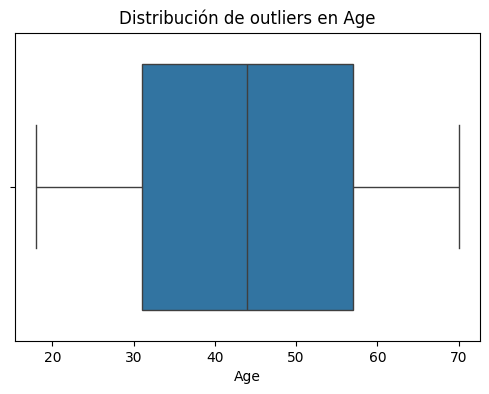

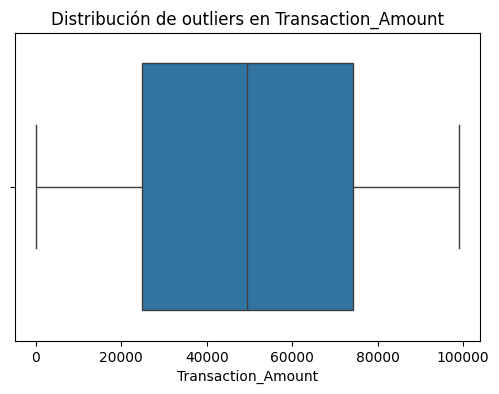

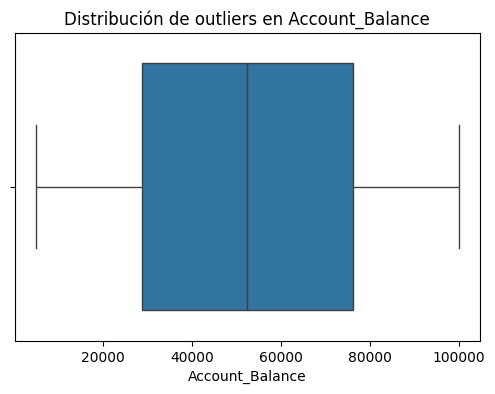

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas numéricas 
cols = ['Age', 'Transaction_Amount', 'Account_Balance']

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Distribución de outliers en {col}')
    plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Recojo información acerca del dataset
df.info()

# Tenemos bastante columnas categoricas , por lo que debemos hacer un encoding de  todas 
# Las agruparemos con .select_dtypes dentro de una variable y luego la recorreremos con un bucle for para encodearlas
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# Recojo información sobre la media, desviación estándar, etc.
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  int64  
 1   Customer_Name            200000 non-null  int64  
 2   Gender                   200000 non-null  int64  
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  int64  
 5   City                     200000 non-null  int64  
 6   Bank_Branch              200000 non-null  int64  
 7   Account_Type             200000 non-null  int64  
 8   Transaction_ID           200000 non-null  int64  
 9   Transaction_Date         200000 non-null  int64  
 10  Transaction_Time         200000 non-null  int64  
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  int64  
 13  Transaction_Type         200000 non-null  int64  
 14  Merc

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.0,200000.000000,200000.000000,200000.000000
mean,99999.500000,71395.319495,0.502260,44.015110,16.533330,70.704070,70.704070,1.00055,99999.500000,14.515985,...,2.499545,52437.988784,8.566740,72.45328,1.500645,0.050440,0.0,4499.198810,85.454745,2390.627750
std,57735.171256,41130.938926,0.499996,15.288774,9.802819,41.883454,41.883454,0.81571,57735.171256,8.672289,...,1.709162,27399.507128,6.109997,42.47563,1.118779,0.218852,0.0,2600.428529,49.686579,1374.208102
min,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,5000.820000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,49999.750000,35762.750000,0.000000,31.000000,8.000000,32.000000,32.000000,0.00000,49999.750000,7.000000,...,1.000000,28742.395000,2.000000,34.00000,0.000000,0.000000,0.0,2248.000000,42.000000,1200.000000
50%,99999.500000,71442.500000,1.000000,44.000000,17.000000,68.000000,68.000000,1.00000,99999.500000,15.000000,...,2.000000,52372.555000,9.000000,70.00000,2.000000,0.000000,0.0,4502.000000,85.000000,2388.000000
75%,149999.250000,106954.250000,1.000000,57.000000,25.000000,107.000000,107.000000,2.00000,149999.250000,22.000000,...,4.000000,76147.670000,13.000000,109.00000,3.000000,0.000000,0.0,6752.000000,129.000000,3579.000000
max,199999.000000,142699.000000,1.000000,70.000000,33.000000,144.000000,144.000000,2.00000,199999.000000,30.000000,...,5.000000,99999.950000,19.000000,147.00000,3.000000,1.000000,0.0,8999.000000,171.000000,4778.000000


In [ ]:
# ¿Hay valores faltantes / nulos en el dataset?
print(f"Numero de valores faltantes:\n{df.isna().sum()}\n")

# ¿Hay duplicados en el dataset?
print(f"Numero de duplicados: {df.duplicated().sum()}")

# Como se puede observar no hay ningun duplicado en el dataset ni valor faltante.


Numero de valores faltantes:
Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

Numero de duplicados: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID

                         Customer_ID  Customer_Name    Gender       Age  \
Customer_ID                 1.000000      -0.001988 -0.001581 -0.000829   
Customer_Name              -0.001988       1.000000 -0.002531 -0.000622   
Gender                     -0.001581      -0.002531  1.000000  0.001692   
Age                        -0.000829      -0.000622  0.001692  1.000000   
State                      -0.001724      -0.001874  0.002899 -0.004638   
City                        0.000417      -0.001879 -0.000299 -0.002284   
Bank_Branch                 0.000417      -0.001879 -0.000299 -0.002284   
Account_Type               -0.004689      -0.000395  0.001260 -0.000281   
Transaction_ID             -0.001076       0.001589  0.000302  0.001400   
Transaction_Date            0.000978       0.002422 -0.003731 -0.001401   
Transaction_Time            0.002788       0.003311 -0.001941 -0.001294   
Transaction_Amount          0.002269       0.002247  0.001468 -0.003087   
Merchant_ID              

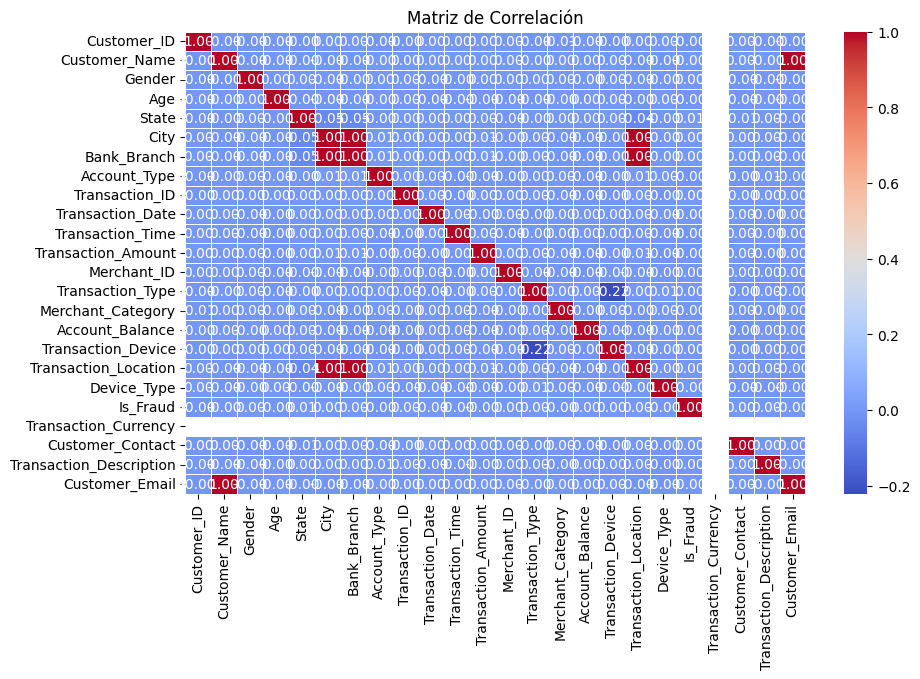

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = df.corr()

print(corr)


plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
# PROFILE REPORT

profile = ProfileReport(df, title="EDA Banco")

profile.to_notebook_iframe() 

Creamos la  variable a predecir junto con las predictoras y dividmos el conjunto dde datos en entrenamiento y testing 

In [21]:


X = df.drop(columns=["Customer_ID","Transaction_ID","Merchant_ID","Is_Fraud","Gender"])
y = df["Is_Fraud"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
# Crear el modelo de Random Forest
model = RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state=42)

# Entrenamos  el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo con accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Random Forest: {accuracy * 100:.2f}%')

Precisión del Random Forest: 94.83%


Mostramos el random Forest 

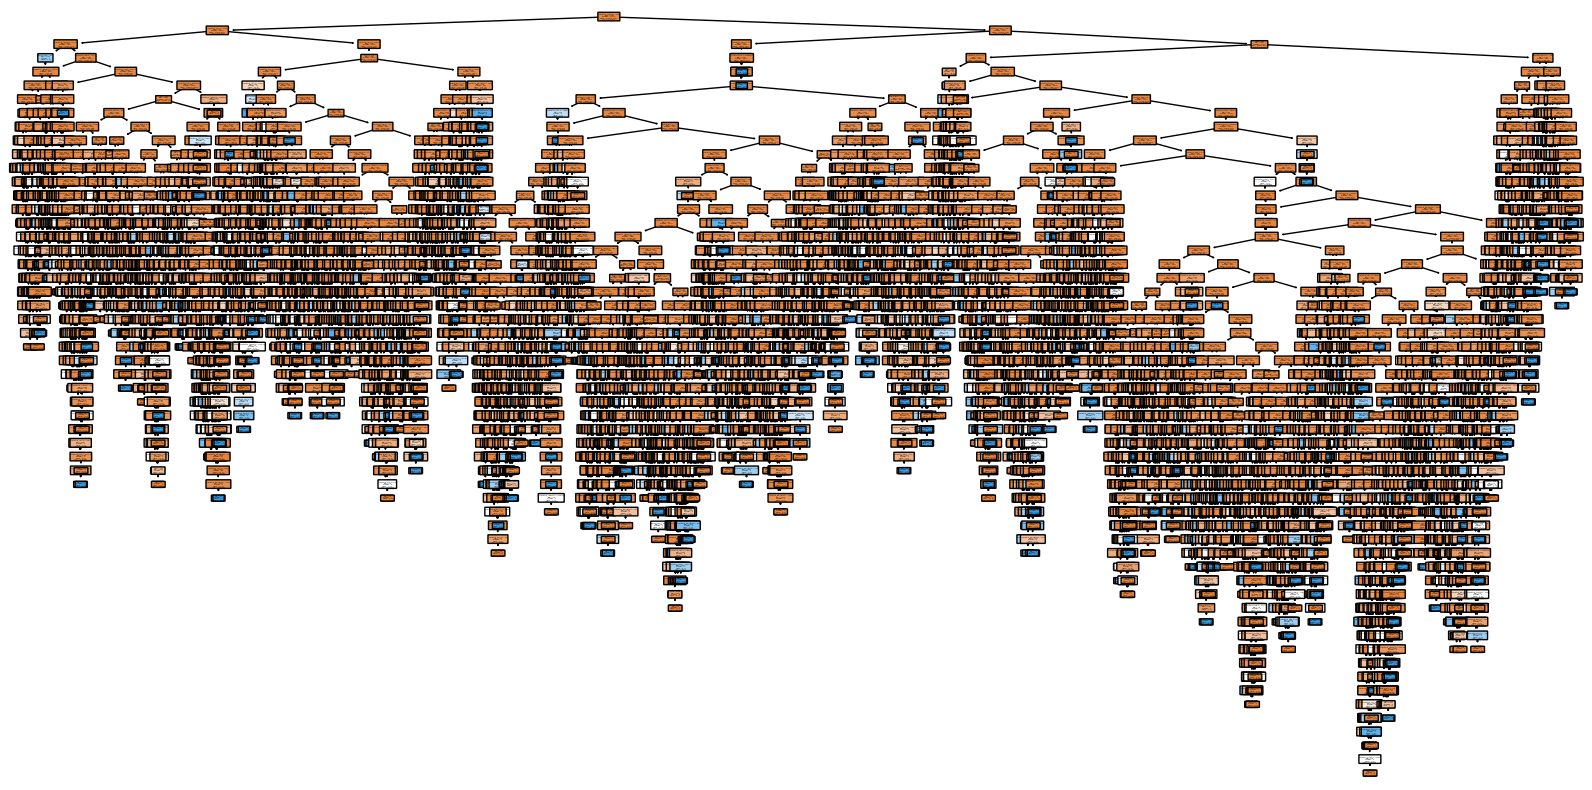

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Visualizar el primer árbol del bosque
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=X_train.columns, class_names=["No Fraude", "Fraude"], filled=True, rounded=True)
plt.show()

Segunda vuelta en la que cambiamos la profindidad máxima del árbol para ver como afecta el rendimiento 

(Se espera que empeore)

In [ ]:


X = df.drop(columns=["Customer_ID","Transaction_ID","Merchant_ID","Is_Fraud","Gender"])
y = df["Is_Fraud"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=42)


Para nuestra sorpesa nuestra el poner una profundidad maxima no  altera el modelo en nada 
(algo no esta correcto )

In [ ]:

model2 = RandomForestClassifier ( class_weight="balanced",n_estimators=100,  max_depth=3, random_state=42 )

# Entrenar el modelo
model2.fit(X_train, y_train)

# Hacer predicciones
y_pred = model2.predict(X_test)

# Evaluar el modelo con accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Random Forest: {accuracy * 100:.2f}%')

Precisión del Random Forest: 94.83%


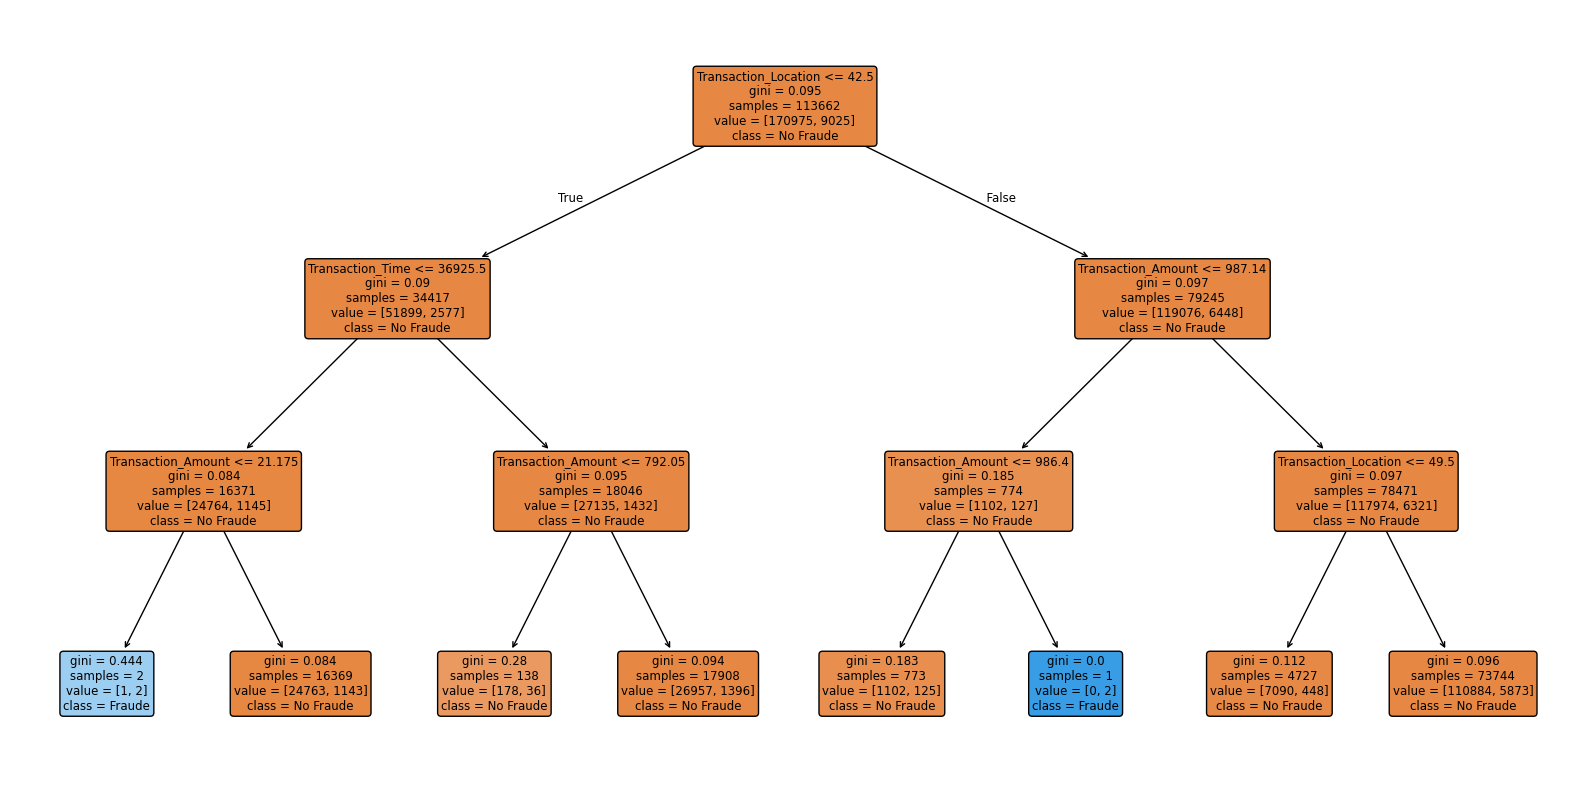

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Visualizar el primer random forest 
plt.figure(figsize=(20, 10))
plot_tree(model2.estimators_[0], feature_names=X_train.columns, class_names=["No Fraude", "Fraude"], filled=True, rounded=True)
plt.show()

Sacamos una matriz de confusion para comprobar que esta haciendo el modelo   y justo el modelo tiene un desbalanceo gigante de la clase fraude 

El modelo esta teniendo muchos falsos negativos por lo cual nos estan colando transacciones fraudulentas 

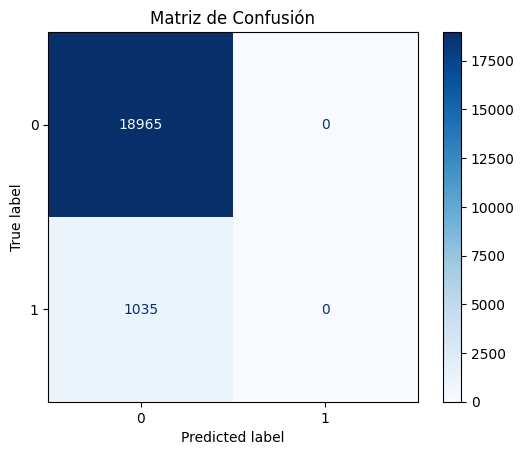

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay( class_weight="balanced",confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

SMOTE :

Intentamos corregir el desbalanceo  de clases en el conjunto de entrenamiento mediante el uso de SMOTE. 

Que es SMOTE?
SMOTE (Synthetic Minority Over-sampling Technique) es una técnica de sobremuestreo que se utiliza para corregir el desbalanceo de clases en un conjunto de datos. Esta técnica crea nuevos ejemplos de la clase minoritaria (la clase con menos ejemplos) para igualar la proporción de ejemplos entre las clases.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


X = df.drop(columns=["Customer_ID", "Transaction_ID", "Merchant_ID", "Is_Fraud"])
y = df["Is_Fraud"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [37]:
# Crear el modelo de Random Forest con 100 árboles
model2 = RandomForestClassifier(class_weight="balanced",max_depth=10 ,n_estimators=100, random_state=42 )

# Entrenar el modelo
model2.fit(X_train, y_train)

# Hacer predicciones
y_pred = model2.predict(X_test)

# Evaluar el modelo con accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Random Forest: {accuracy * 100:.2f}%')

from sklearn.metrics import roc_curve, roc_auc_score
y_proba = model2.predict_proba(X_test)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

Precisión del Random Forest: 88.16%
AUC-ROC: 0.49923128162608216


La precisión del modelo a bajado lo que podria ser un buen indicador de que el modelo esta menos desbalanceado

Asique sacamos otra matriz de confuision y esta vez  no solo dat falsos negativos , sino falsos positivo que es mejor pero 
sigue fallando  y dando falsos negativos y positivos .p

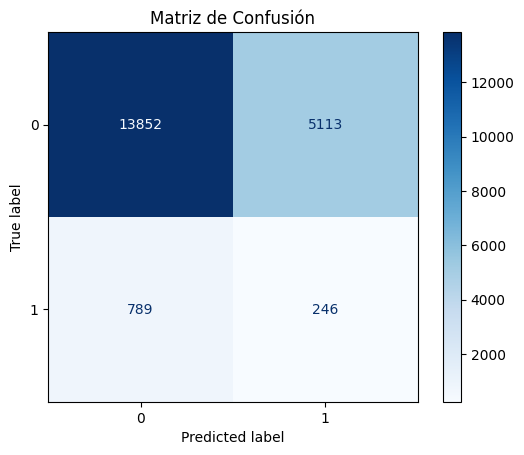

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

RandomUnderSampler :

Intentamos corregir el desbalanceo  de clases en el conjunto de entrenamiento mediante el uso de RandomUnderSampler. 

¿Qué hace RandomUnderSampler?

Reduce la cantidad de ejemplos de la clase mayoritaria eliminando aleatoriamente muestras, de modo que el dataset quede balanceado.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, roc_auc_score



X = df.drop(columns=["Customer_ID", "Transaction_ID", "Merchant_ID", "Is_Fraud"])
y = df["Is_Fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)


In [34]:
# Crear el modelo de Random Forest con 100 árboles
model2 = RandomForestClassifier(class_weight="balanced",max_depth=10 ,n_estimators=100, random_state=42 )

# Entrenar el modelo
model2.fit(X_train, y_train)

# Hacer predicciones
y_pred = model2.predict(X_test)

# Evaluar el modelo con accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Random Forest: {accuracy * 100:.2f}%')


y_proba = model2.predict_proba(X_test)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

Precisión del Random Forest: 49.88%
AUC-ROC: 0.4962403919755563


Este es el peor intento de todos  los que  hemos realizado  la precisión ha bajado al 50 %  .

Por lo que el modelo es como una moneda al aire  a la hora de predecir 

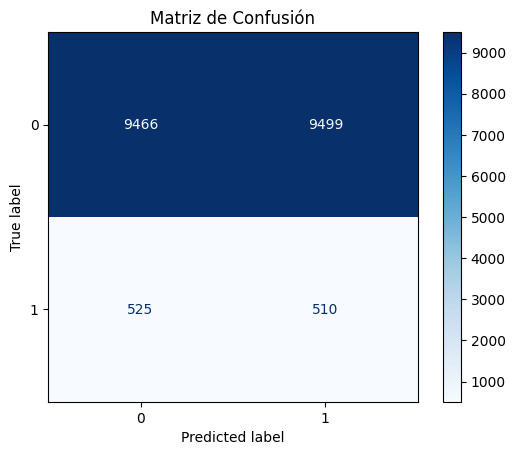

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

SMOTEENN

En este ultimo intento  intentamos el balanceo con SMOTEENN :

¿Qué  hace  SMOTEENN?

-Crea nuevos ejemplos sintéticos de la clase minoritaria
-Y elimina los ejemplos de la clase mayoritaria que son más similares a los nuevos ejemplos creados.(Para que haya mas diferencia entre las clases y pueda difrenciar mejor el modelo )


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_curve, roc_auc_score



X = df.drop(columns=["Customer_ID", "Transaction_ID", "Merchant_ID", "Is_Fraud"])
y = df["Is_Fraud"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



smote_enn = SMOTEENN(random_state=42)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)




In [ ]:

model2 = RandomForestClassifier(class_weight="balanced",max_depth=10 ,n_estimators=100, random_state=42 )


model2.fit(X_train, y_train)

# Hacer predicciones
y_pred = model2.predict(X_test)

# Evaluar el modelo con accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Random Forest: {accuracy * 100:.2f}%')


y_proba = model2.predict_proba(X_test)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_proba))

Precisión del Random Forest: 87.18%
AUC-ROC: 0.5003546578938319


La precisión se mantiene  parecida al primer intento pero nada el modelo no es capaz de   diferenciar entre clases  debido al balanceo 

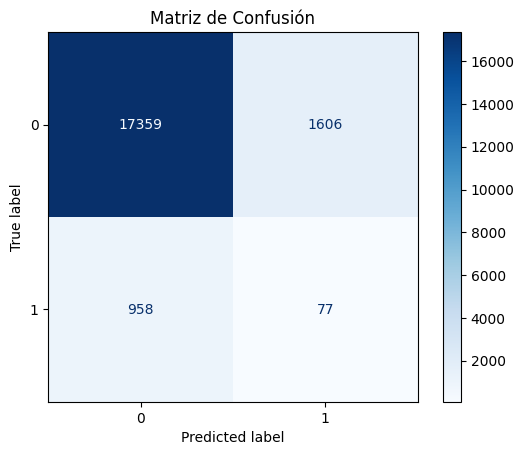

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()